## Import packages

In [3]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
import plotly.offline as py
import seaborn as sns # visualization
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import ADASYN


## Connect to Dir/google drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
new_dir = Path("/content/drive/MyDrive/01 Advanced data analytics/Assignment1 churn prediction of telco custemers/data")
os.chdir(new_dir)

## Exploratory Data Analysis

In [66]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test.head(10)

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,id
0,F,20.0,23/05/96,55.582251,3.0,CAT 200,WC95,513.0,1075.667903,110.0,...,167.242853,OK,0.116924,0.824189,0.173365,0.009823,0.020349,F,F,K751808
1,F,54.0,01/03/98,32.067010,0.0,Play 300,BS110,13.0,378.078657,93.0,...,136.404621,OK,0.120457,0.415020,0.532898,0.022391,0.124480,F,F,K837351
2,F,28.0,11/10/98,26.621954,0.0,CAT 200,ASAD170,1000.0,2064.343139,90.0,...,397.739114,OK,0.149435,0.960100,0.034434,0.006660,0.225763,F,F,K548114
3,F,26.0,12/08/98,27.652735,5.0,CAT 200,WC95,122.0,999.111887,126.0,...,196.789012,OK,0.137372,0.745483,0.263256,0.005870,0.108872,F,F,K736156
4,F,34.0,28/10/98,25.479355,0.0,CAT 100,WC95,164.0,742.647381,73.0,...,160.450386,OK,0.180704,0.771754,0.166995,0.056390,0.090896,F,F,K508080
5,M,56.0,03/09/99,10.919178,1.0,CAT 100,S50,436.0,712.455808,3.0,...,183.136329,OK,0.165463,0.792102,0.234195,0.008151,0.140578,F,F,K823422
6,F,58.0,21/04/98,29.213510,1.0,CAT 200,BS110,323.0,894.221666,28.0,...,164.657363,OK,0.167143,0.881027,0.086642,0.015298,0.071880,F,F,K912220
7,F,18.0,28/04/98,31.948351,0.0,CAT 200,S50,510.0,1113.167577,200.0,...,256.978658,OK,0.156774,0.699357,0.294767,0.017815,0.150190,F,F,K917925
8,M,11.0,22/03/99,19.797206,2.0,Play 300,ASAD170,330.0,791.823494,355.0,...,218.029645,OK,0.108974,0.494053,0.489971,0.011771,0.254147,F,F,K857768
9,F,12.0,03/08/96,51.517270,0.0,CAT 200,ASAD170,464.0,1366.492676,26.0,...,272.521790,OK,0.154209,0.928105,0.083510,0.042641,0.241730,F,F,K733855


1. **Gender**: User's gender.
2. **Age**: User's age.
3. **Connect_Date**: Date the user connected or subscribed to the service.
4. **L_O_S (Length of Service)**: Duration of the user's service usage.
5. **Dropped_Calls**: Number of dropped calls the user experienced.
6. **Tariff**: Tariff plan the user is subscribed to.
7. **Handset**: Model of the user's mobile phone.
8. **Peak_calls_Sum**: Total number of calls during peak hours.
9. **Peak_mins_Sum**: Total minutes of calls during peak hours.
10. **OffPeak_calls_Sum**: Total number of calls during off-peak hours.
11. **OffPeak_mins_Sum**: Total minutes of calls during off-peak hours.
12. **Weekend_calls_Sum**: Total number of calls during weekends.
13. **Weekend_mins_Sum**: Total minutes of calls during weekends.
14. **International_mins_Sum**: Total minutes of international calls.
15. **Nat_call_cost_Sum**: Total cost of national calls.
16. **AvePeak/AveOffPeak/AveWeekend**: Average call duration in minutes during peak, off-peak, and weekend periods.
17. **National_calls/National_mins/AveNational**: Variables related to national calls: total number of national calls, total minutes of national calls, and average duration of national calls.
18. **All_calls_mins**: Total minutes of all calls.
19. **Dropped_calls_ratio**: Ratio of dropped calls.
20. **Usage_Band**: Frequency band of usage.
21. **Mins_charge**: Charge for call minutes.
22. **call_cost_per_min**: Cost per minute of calls.
23. **actual call cost/Total_call_cost/Total_Cost**: Variables related to call costs: actual call cost, total call cost, and total cost.
24. **Tariff_OK**: Whether the tariff is normal.
25. **average cost min**: Minimum average cost.
26. **Peak ratio/OffPeak ratio/Weekend ratio**: Ratios of call minutes during peak, off-peak, and weekend periods.
27. **Nat-InterNat Ratio**: Ratio of national calls to international calls.
28. **high Dropped calls**: Whether there are high dropped calls.
29. **No Usage**: Whether there is no usage.

In [67]:
test.columns.tolist()

['Gender',
 'Age',
 'Connect_Date',
 'L_O_S',
 'Dropped_Calls',
 'tariff',
 'Handset',
 'Peak_calls_Sum',
 'Peak_mins_Sum',
 'OffPeak_calls_Sum',
 'OffPeak_mins_Sum',
 'Weekend_calls_Sum',
 'Weekend_mins_Sum',
 'International_mins_Sum',
 'Nat_call_cost_Sum',
 'AvePeak',
 'AveOffPeak',
 'AveWeekend',
 'National_calls',
 'National mins',
 'AveNational',
 'All_calls_mins',
 'Dropped_calls_ratio',
 'Usage_Band',
 'Mins_charge',
 'call_cost_per_min',
 'actual call cost',
 'Total_call_cost',
 'Total_Cost',
 'Tariff_OK',
 'average cost min',
 'Peak ratio',
 'OffPeak ratio',
 'Weekend ratio',
 'Nat-InterNat Ratio',
 'high Dropped calls',
 'No Usage',
 'id']

In [68]:
train['average cost min']

0       0.150531
1       0.188988
2       0.239300
3       0.221467
4       0.107509
          ...   
5039    0.130433
5040    0.189112
5041    0.112657
5042    0.205957
5043    0.187393
Name: average cost min, Length: 5044, dtype: float64

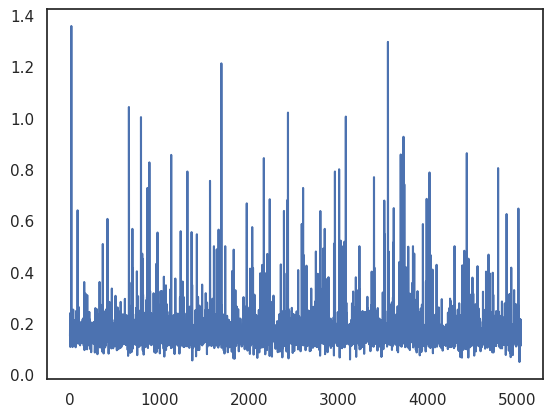

In [69]:
plt.plot(train.index,train['average cost min'])

In [70]:
train['average cost min'].describe()

count    5044.000000
mean        0.168484
std         0.078024
min         0.048998
25%         0.134453
50%         0.154474
75%         0.179141
max         1.357564
Name: average cost min, dtype: float64

In [71]:
train['target'].value_counts()

target
0    4299
1     745
Name: count, dtype: int64

### Pie chart of churn distribution

In [72]:
from plotly.subplots import make_subplots
type_ = ["No", "yes"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=train['target'].value_counts(), name="Churn"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

### Classification of predictors

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  5044 non-null   object 
 1   Age                     5044 non-null   float64
 2   Connect_Date            5044 non-null   object 
 3   L_O_S                   5044 non-null   float64
 4   Dropped_Calls           5044 non-null   float64
 5   tariff                  5044 non-null   object 
 6   Handset                 5044 non-null   object 
 7   Peak_calls_Sum          5044 non-null   float64
 8   Peak_mins_Sum           5044 non-null   float64
 9   OffPeak_calls_Sum       5044 non-null   float64
 10  OffPeak_mins_Sum        5044 non-null   float64
 11  Weekend_calls_Sum       5044 non-null   float64
 12  Weekend_mins_Sum        5044 non-null   float64
 13  International_mins_Sum  5044 non-null   float64
 14  Nat_call_cost_Sum       5044 non-null   

Checking the number of unique values in each column

In [74]:
features = train.columns
for feature in features:
    print(f'{feature}---->{train[feature].nunique()}')

Gender---->2
Age---->68
Connect_Date---->1349
L_O_S---->1349
Dropped_Calls---->16
tariff---->5
Handset---->11
Peak_calls_Sum---->878
Peak_mins_Sum---->3323
OffPeak_calls_Sum---->425
OffPeak_mins_Sum---->3196
Weekend_calls_Sum---->93
Weekend_mins_Sum---->982
International_mins_Sum---->5036
Nat_call_cost_Sum---->3090
AvePeak---->4771
AveOffPeak---->4558
AveWeekend---->2225
National_calls---->991
National mins---->4651
AveNational---->4999
All_calls_mins---->5038
Dropped_calls_ratio---->1868
Usage_Band---->5
Mins_charge---->4489
call_cost_per_min---->4979
actual call cost---->3069
Total_call_cost---->5036
Total_Cost---->5037
Tariff_OK---->4
average cost min---->4915
Peak ratio---->4963
OffPeak ratio---->4941
Weekend ratio---->4538
Nat-InterNat Ratio---->4746
high Dropped calls---->2
No Usage---->2
target---->2
id---->5044


### Detcet Missing values

Dropped_calls_ratio       4\
Usage_Band                4\
call_cost_per_min         4


In [75]:
missing_values_train = train.isnull().sum()
print(missing_values_train)

Gender                    0
Age                       0
Connect_Date              0
L_O_S                     0
Dropped_Calls             0
tariff                    0
Handset                   0
Peak_calls_Sum            0
Peak_mins_Sum             0
OffPeak_calls_Sum         0
OffPeak_mins_Sum          0
Weekend_calls_Sum         0
Weekend_mins_Sum          0
International_mins_Sum    0
Nat_call_cost_Sum         0
AvePeak                   0
AveOffPeak                0
AveWeekend                0
National_calls            0
National mins             0
AveNational               0
All_calls_mins            0
Dropped_calls_ratio       4
Usage_Band                4
Mins_charge               0
call_cost_per_min         4
actual call cost          0
Total_call_cost           0
Total_Cost                0
Tariff_OK                 0
average cost min          0
Peak ratio                0
OffPeak ratio             0
Weekend ratio             0
Nat-InterNat Ratio        0
high Dropped calls  

In [76]:
missing_columns = ["Dropped_calls_ratio","Usage_Band","call_cost_per_min"]
train[train.isnull().any(axis=1)]

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,target,id
1736,F,48.0,26/07/98,26.966667,2.0,Play 100,BS110,0.0,0.0,0.0,...,OK,0.5,0.0,0.0,0.0,0.0,F,T,0,K244380
3237,F,34.0,22/03/97,43.333333,2.0,Play 100,BS110,0.0,0.0,0.0,...,OK,0.5,0.0,0.0,0.0,0.0,F,T,0,K244320
3836,M,21.0,03/01/96,58.133333,2.0,Play 100,CAS30,0.0,0.0,0.0,...,OK,0.5,0.0,0.0,0.0,0.0,F,T,1,K213590
4301,F,22.0,08/08/98,26.533333,5.0,Play 100,CAS30,0.0,0.0,0.0,...,OK,0.5,0.0,0.0,0.0,0.0,F,T,1,K212820


In [77]:
train[missing_columns].describe()

,Dropped_calls_ratio,call_cost_per_min
count,5040.000000,5040.000000
mean,0.007445,10.092345
std,0.019773,2.105534
min,0.000000,2.000000
25%,0.000000,8.578771
50%,0.002304,9.513941
75%,0.006897,11.749149
max,0.500000,21.734694


In [78]:
def replace_na(data, df):
  # numeric columns
  data["Dropped_calls_ratio"].fillna(df["Dropped_calls_ratio"].mean(), inplace=True)
  data["call_cost_per_min"].fillna(df["call_cost_per_min"].mean(), inplace=True)
  # categorical columns
  data["Usage_Band"].fillna(df["Usage_Band"].mode()[0], inplace=True)

replace_na(train, train)
replace_na(test, train)

In [79]:
train.isnull().any().any()

False

### Categorical variables distribution by churn and non-churn

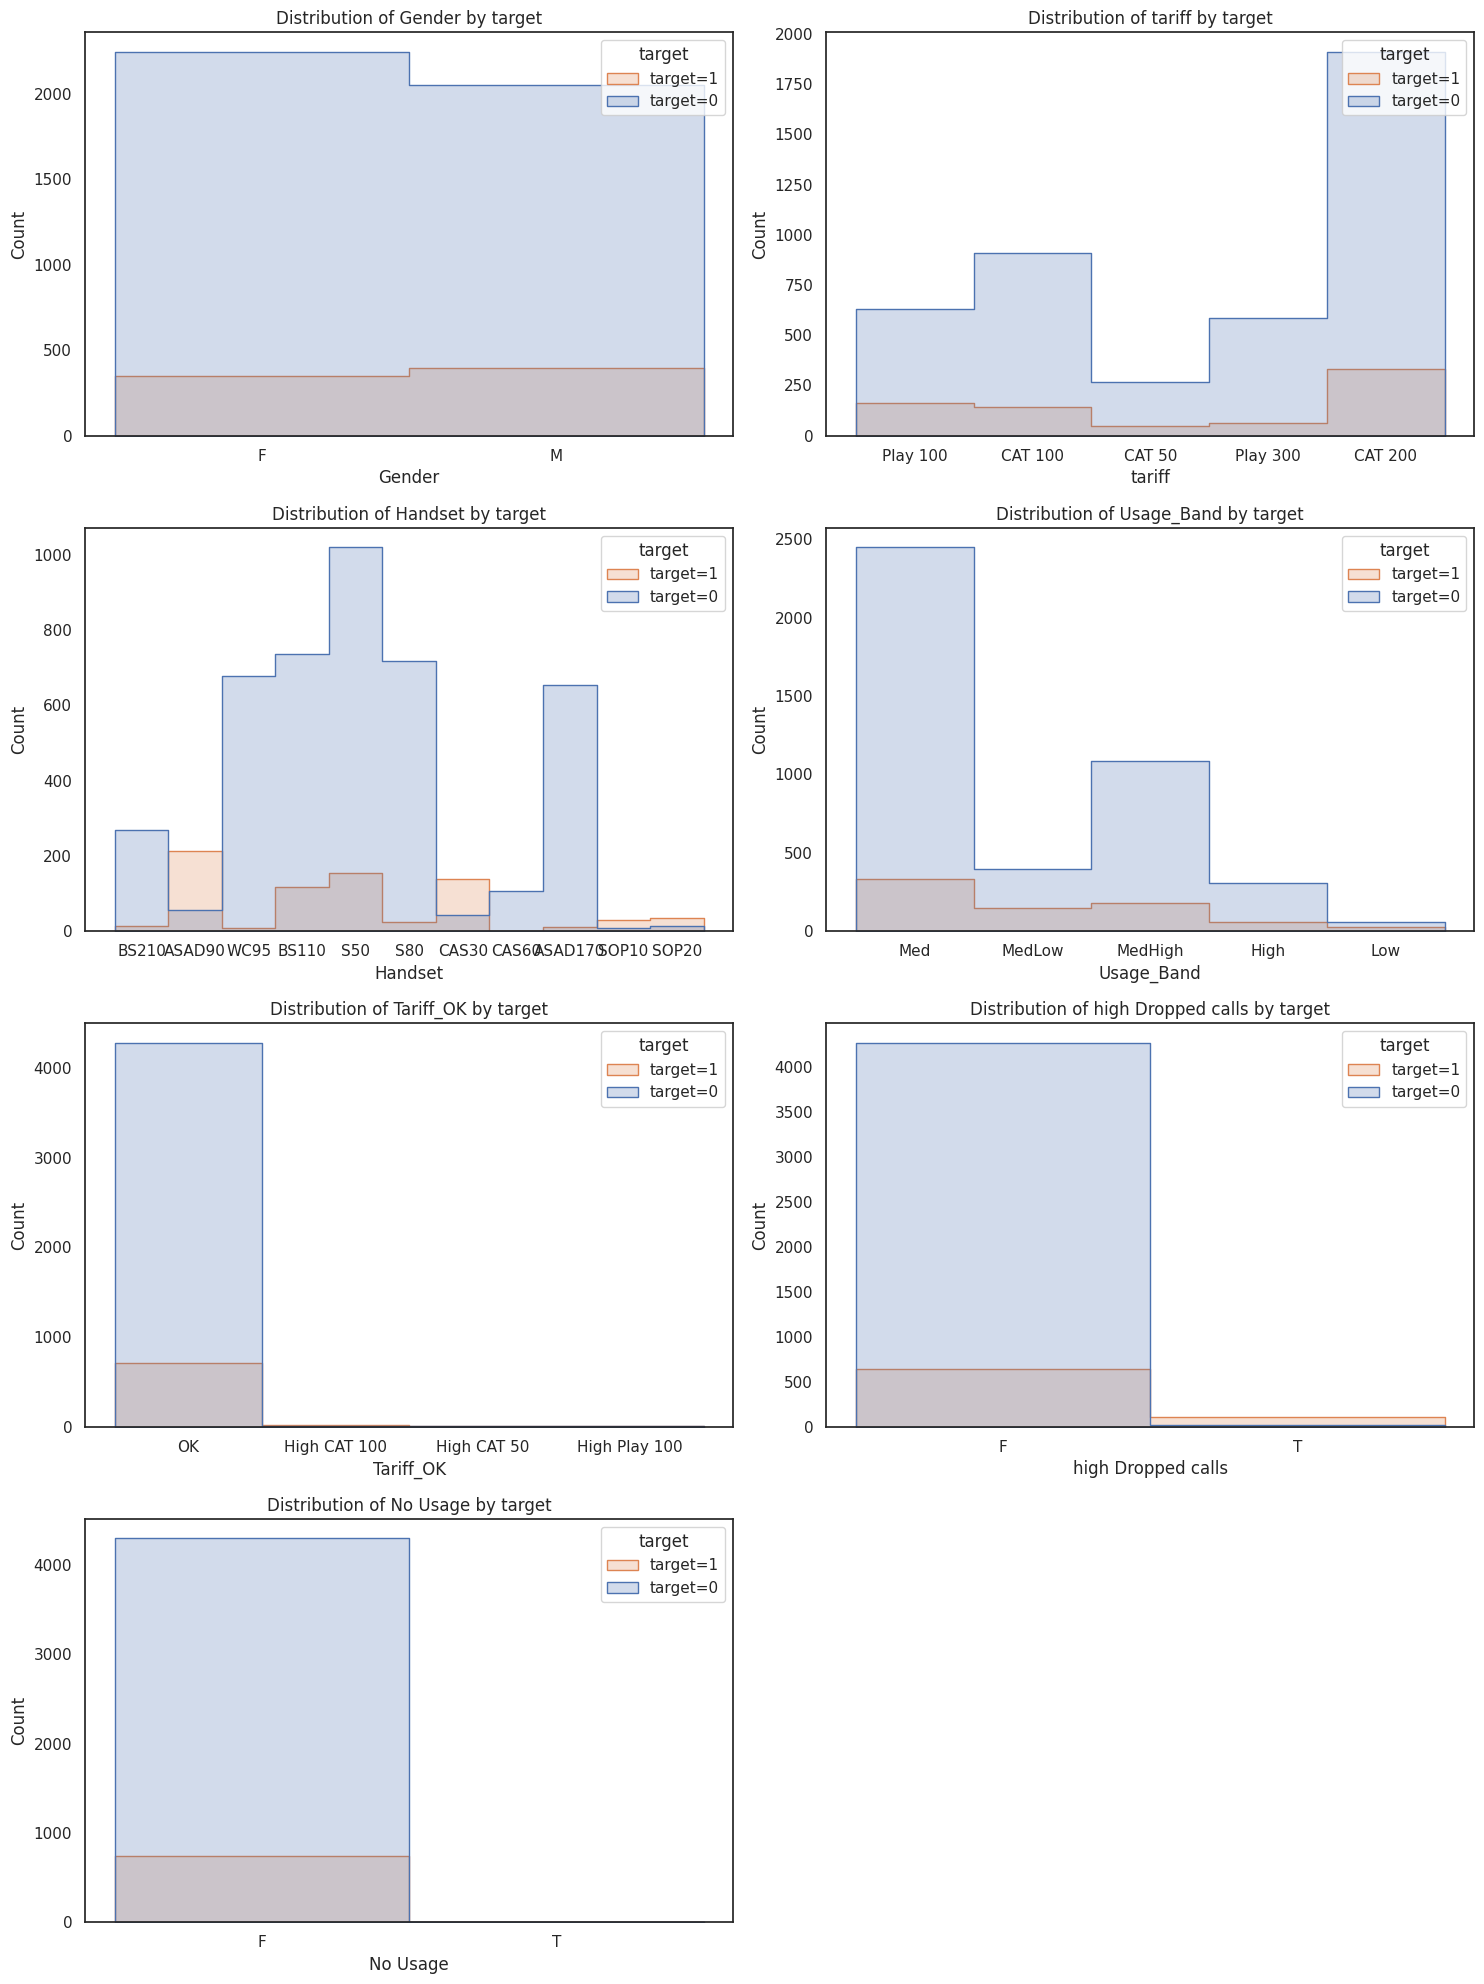

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

def plot_histogram(data, column_name, target, ax):
    sns.histplot(data=data, x=column_name, hue=target, multiple="layer", element="step", ax=ax, legend=True)
    ax.set_title(f'Distribution of {column_name} by {target}')
    ax.set_xlabel(column_name)
    ax.set_ylabel('Count')
    ax.legend(title=target, labels=[f'{target}=1', f'{target}=0'])

# Get all categorical data columns in the dataset
categorical_columns = train.select_dtypes(include=['object']).drop(columns=["id", "Connect_Date"]).columns

# Calculate the number of subplots needed
num_plots = len(categorical_columns)

# Calculate the number of rows and columns needed
num_rows = math.ceil(num_plots / 2)  # display three plots per row
num_cols = min(num_plots, 2)

# Create subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows*5))

# Plot histograms for each categorical data column
for i, col in enumerate(categorical_columns):
    row = i // num_cols
    col_idx = i % num_cols
    ax = axs[row, col_idx] if num_rows > 1 else axs[col_idx]
    plot_histogram(train, col, "target", ax)

# Hide empty subplots
for i in range(num_plots, num_rows*num_cols):
    row = i // num_cols
    col_idx = i % num_cols
    axs[row, col_idx].axis('off')

# Adjust layout and display the figure
plt.tight_layout()
plt.show()


###Identify high correlated features

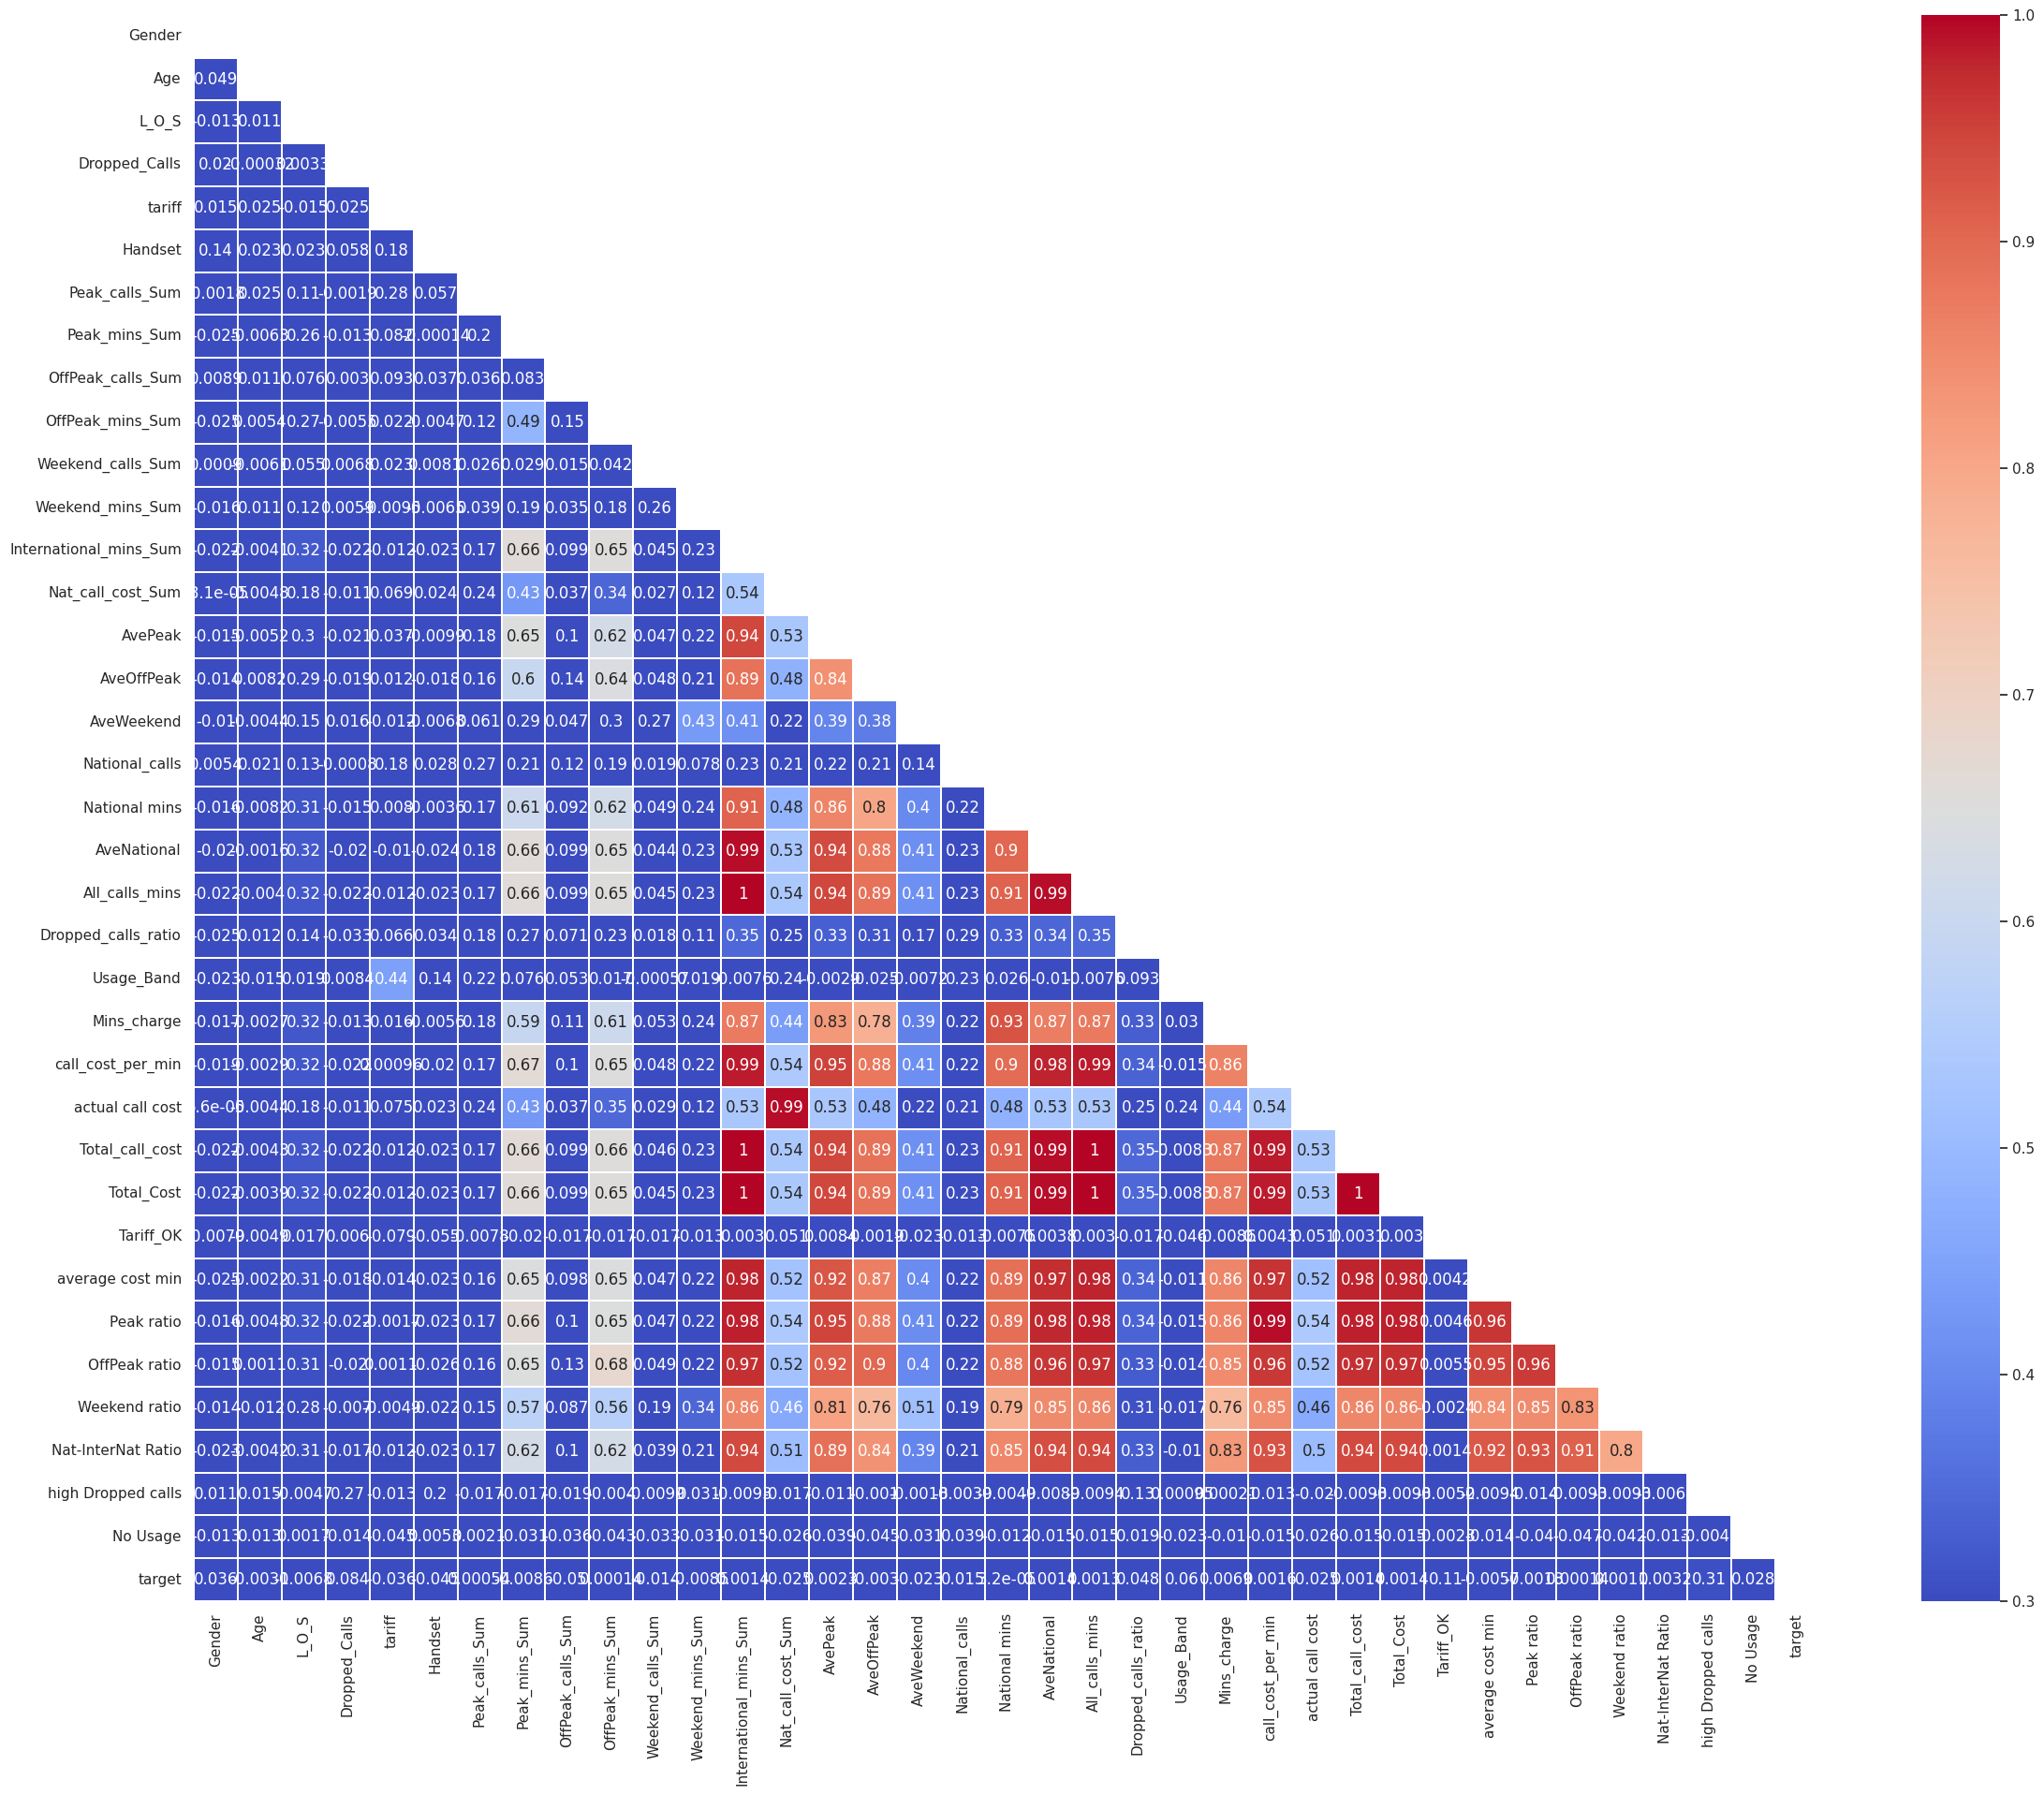

In [81]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
plt.figure(figsize=(28, 22))
train_cor = train.drop(["id", "Connect_Date"], axis = 1)
corr = train_cor.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=0.3, vmax=1)

In [82]:
# Define the threshold
threshold = 0.9

# Find pairs of highly correlated columns
high_corr_cols = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname = corr.columns[i]
            high_corr_cols.add(colname)

high_corr_cols


{'All_calls_mins',
 'AveNational',
 'AvePeak',
 'Mins_charge',
 'Nat-InterNat Ratio',
 'National mins',
 'OffPeak ratio',
 'Peak ratio',
 'Total_Cost',
 'Total_call_cost',
 'actual call cost',
 'average cost min',
 'call_cost_per_min'}

## Preprocess data

### Define Preprocess function

Drop high correlated columns, covert data type to be suitable for training. On-hot encoding categorical data type and scaling numerical data. Attribute X_train and y_train data.

In [83]:
from sklearn.preprocessing import StandardScaler


def Pre_process(data_train, data_test):
    # Drop 'id' column
    data_train = data_train.drop(['id'], axis=1)
    data_test = data_test.drop(['id'], axis=1)

    #Drop 'Connect_Date' column
    data_train = data_train.drop(['Connect_Date'], axis=1)
    data_test = data_test.drop(['Connect_Date'], axis=1)

    # Drop high-correlation columns
    drop_columns = ['All_calls_mins',
                    'AveNational',
                    'AvePeak',
                    'Mins_charge',
                    'Nat-InterNat Ratio',
                    'National mins',
                    'OffPeak ratio',
                    'Peak ratio',
                    'Total_Cost',
                    'Total_call_cost',
                    'actual call cost',
                    'call_cost_per_min']

    data_train = data_train.drop(drop_columns, axis=1)
    data_test = data_test.drop(drop_columns, axis=1)

    # Convert 'Connect_Date' to datetime
    #data_train['Connect_Date'] = data_train['Connect_Date'].apply(lambda x: datetime.datetime.strptime(x, "%d/%m/%y"))
    #data_test['Connect_Date'] = data_test['Connect_Date'].apply(lambda x: datetime.datetime.strptime(x, "%d/%m/%y"))

    # Numeric feature scaling
    numeric_columns = ['Age',
                       'L_O_S',
                       'Dropped_Calls',
                       'Peak_calls_Sum',
                       'Peak_mins_Sum',
                       'OffPeak_calls_Sum',
                       'OffPeak_mins_Sum',
                       'Weekend_calls_Sum',
                       'Weekend_mins_Sum',
                       'International_mins_Sum',
                       'Nat_call_cost_Sum',
                       'AveOffPeak',
                       'AveWeekend',
                       'National_calls',
                       'Dropped_calls_ratio',
                       'average cost min',
                       'Weekend ratio']

    for col in numeric_columns:
        data_train[col] = pd.to_numeric(data_train[col], errors='coerce')
        data_test[col] = pd.to_numeric(data_test[col], errors='coerce')

    scaler = StandardScaler()
    data_train[numeric_columns] = scaler.fit_transform(data_train[numeric_columns])
    data_test[numeric_columns] = scaler.transform(data_test[numeric_columns])

    # One-Hot encoding
    dummies = ['Gender',
               'tariff',
               'Handset',
               'Usage_Band',
               'Tariff_OK',
               'high Dropped calls',
               'No Usage']

    train_dummies = pd.get_dummies(data_train[dummies])
    test_dummies = pd.get_dummies(data_test[dummies])

    # Ensure consistent feature columns after One-Hot encoding
    common_columns = train_dummies.columns.intersection(test_dummies.columns)
    train_dummies = train_dummies[common_columns]
    test_dummies = test_dummies[common_columns]

    Xy_train = data_train.drop(dummies, axis=1).join(train_dummies)
    Xy_test = data_test.drop(dummies, axis=1).join(test_dummies)

    # Move the target column from training set and append it
    target_train = Xy_train.pop('target')
    Xy_train['target'] = target_train

    # Get features and target
    X_train = Xy_train.iloc[:, :-1]
    y_train = Xy_train.iloc[:, -1]
    X_test = Xy_test

    return X_train, y_train, X_test

In [84]:
# Call the Pre_process function
X_train, y_train, X_test = Pre_process(train, test)

### Try imbalanced learn

In [25]:
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

## Model building and comparison

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay

### 1.Random Forest

Because we don't have the true result of test data, so we split the train  dataset into train and validation(used as test) data.

Split the training data into training and validation sets for model companion

In [64]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

Cross-validated AUC scores: [0.93979627 0.92997606 0.90493087 0.93367696 0.94374697]
Mean AUC: 0.930425424375769
Standard Deviation of AUC: 0.013608989939156596
Accuracy: 0.9326065411298315
Precision: 0.8347107438016529
Recall: 0.6778523489932886
F1 Score: 0.7481481481481481
ROC AUC: 0.9282503511783986
Confusion Matrix:
[[840  20]
 [ 48 101]]


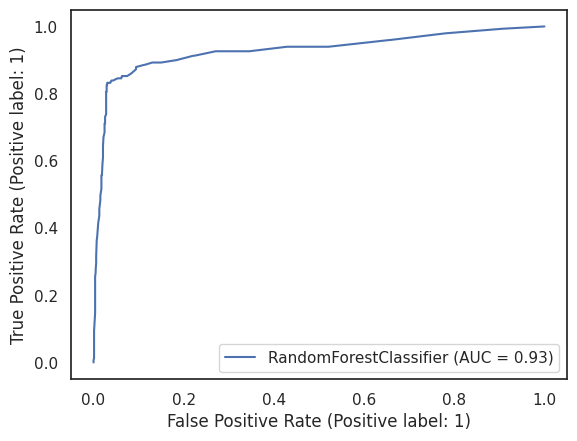

In [93]:
# Define the Random Forest classifier
RF = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

# Perform cross-validation using StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(RF, X_train_split, y_train_split, cv=cv, scoring='roc_auc')

print(f'Cross-validated AUC scores: {scores}')
print(f'Mean AUC: {np.mean(scores)}')
print(f'Standard Deviation of AUC: {np.std(scores)}')

# Train the model and make predictions
RF.fit(X_train_split, y_train_split)
y_val_pred = RF.predict(X_val_split)
y_val_pred_prob = RF.predict_proba(X_val_split)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val_split, y_val_pred)
precision = precision_score(y_val_split, y_val_pred)
recall = recall_score(y_val_split, y_val_pred)
f1 = f1_score(y_val_split, y_val_pred)
roc_auc = roc_auc_score(y_val_split, y_val_pred_prob)
conf_matrix = confusion_matrix(y_val_split, y_val_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot the ROC curve
RocCurveDisplay.from_estimator(RF, X_val_split, y_val_split)
plt.show()


### 2.SVM Model

In [87]:
from sklearn.svm import SVC

Cross-validated AUC scores: [0.92781415 0.92730115 0.89321135 0.92350254 0.92285298]
Mean AUC: 0.9189364361566705
Standard Deviation of AUC: 0.013013460449384505
Accuracy: 0.9197224975222993
Precision: 0.8469387755102041
Recall: 0.5570469798657718
F1 Score: 0.6720647773279351
ROC AUC: 0.929717496488216
Confusion Matrix:
[[845  15]
 [ 66  83]]


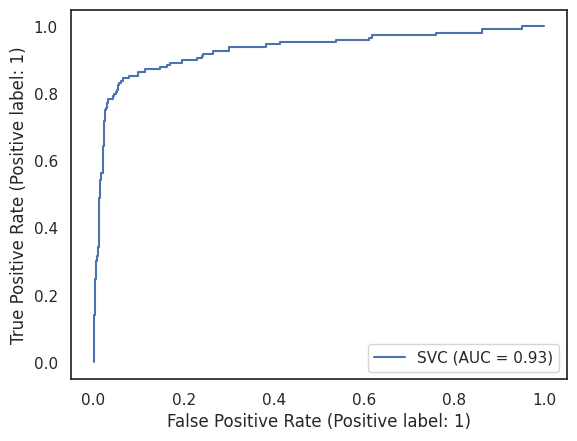

In [96]:
# Define the SVM classifier with probability estimates
SVM = SVC(kernel='rbf', probability=True, random_state=0)

# Perform cross-validation using StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(SVM, X_train_split, y_train_split, cv=cv, scoring='roc_auc')

print(f'Cross-validated AUC scores: {scores}')
print(f'Mean AUC: {np.mean(scores)}')
print(f'Standard Deviation of AUC: {np.std(scores)}')

# Train the model and make predictions
SVM.fit(X_train_split, y_train_split)
y_val_pred = SVM.predict(X_val_split)
y_val_pred_prob = SVM.predict_proba(X_val_split)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val_split, y_val_pred)
precision = precision_score(y_val_split, y_val_pred)
recall = recall_score(y_val_split, y_val_pred)
f1 = f1_score(y_val_split, y_val_pred)
roc_auc = roc_auc_score(y_val_split, y_val_pred_prob)
conf_matrix = confusion_matrix(y_val_split, y_val_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot the ROC curve
RocCurveDisplay.from_estimator(SVM, X_val_split, y_val_split)
plt.show()


### 3.KNN

Cross-validated AUC scores: [0.76378982 0.80098202 0.74192031 0.78049272 0.77549127]
Mean AUC: 0.7725352280650251
Standard Deviation of AUC: 0.019468101987128943
Accuracy: 0.8741328047571854
Precision: 0.7619047619047619
Recall: 0.21476510067114093
F1 Score: 0.33507853403141363
ROC AUC: 0.7867020446386765
Confusion Matrix:
[[850  10]
 [117  32]]


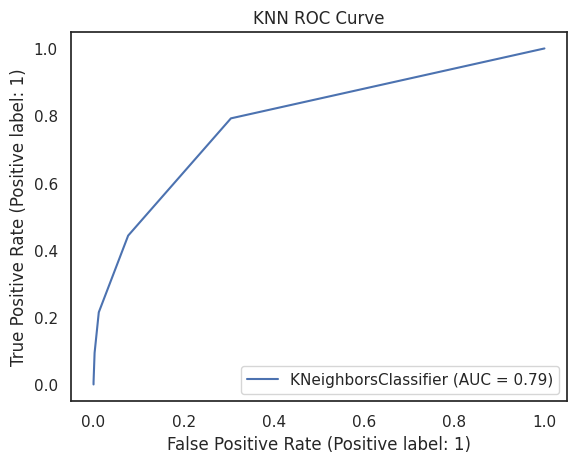

In [99]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation using StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn, X_train_split, y_train_split, cv=cv, scoring='roc_auc')

print(f'Cross-validated AUC scores: {scores}')
print(f'Mean AUC: {np.mean(scores)}')
print(f'Standard Deviation of AUC: {np.std(scores)}')

# Train the model and make predictions
knn.fit(X_train_split, y_train_split)
y_val_pred = knn.predict(X_val_split)
y_val_pred_prob = knn.predict_proba(X_val_split)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val_split, y_val_pred)
precision = precision_score(y_val_split, y_val_pred)
recall = recall_score(y_val_split, y_val_pred)
f1 = f1_score(y_val_split, y_val_pred)
roc_auc = roc_auc_score(y_val_split, y_val_pred_prob)
conf_matrix = confusion_matrix(y_val_split, y_val_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot the ROC curve
RocCurveDisplay.from_estimator(knn, X_val_split, y_val_split)
plt.title('KNN ROC Curve')
plt.show()


### 4.XGBoost

Cross-validated AUC scores: [0.95108218 0.938013   0.92298954 0.94488958 0.93509219]
Mean AUC: 0.9384132979213147
Standard Deviation of AUC: 0.009502893795965903
Accuracy: 0.9345887016848364
Precision: 0.832
Recall: 0.697986577181208
F1 Score: 0.759124087591241
ROC AUC: 0.9301935383174652
Confusion Matrix:
[[839  21]
 [ 45 104]]


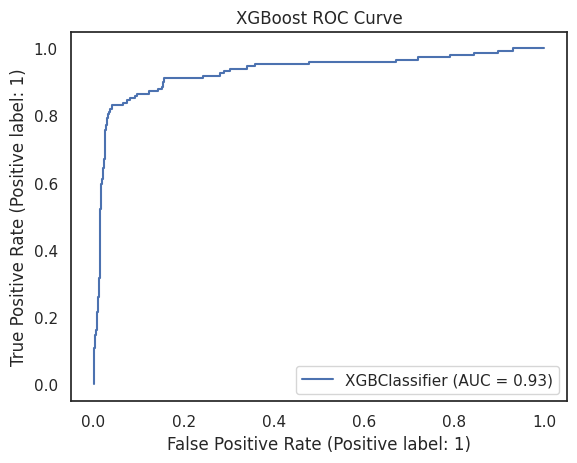

In [100]:
import xgboost as xgb

# Define the XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# Perform cross-validation using StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_clf, X_train_split, y_train_split, cv=cv, scoring='roc_auc')

print(f'Cross-validated AUC scores: {scores}')
print(f'Mean AUC: {np.mean(scores)}')
print(f'Standard Deviation of AUC: {np.std(scores)}')

# Train the model and make predictions
xgb_clf.fit(X_train_split, y_train_split)
y_val_pred = xgb_clf.predict(X_val_split)
y_val_pred_prob = xgb_clf.predict_proba(X_val_split)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val_split, y_val_pred)
precision = precision_score(y_val_split, y_val_pred)
recall = recall_score(y_val_split, y_val_pred)
f1 = f1_score(y_val_split, y_val_pred)
roc_auc = roc_auc_score(y_val_split, y_val_pred_prob)
conf_matrix = confusion_matrix(y_val_split, y_val_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot the ROC curve
RocCurveDisplay.from_estimator(xgb_clf, X_val_split, y_val_split)
plt.title('XGBoost ROC Curve')
plt.show()


## Model Evaluation

### Evaluation Metrics for Classification Models

#### Accuracy
Accuracy measures the proportion of correct predictions among the total number of predictions. It is calculated as:

$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

Where:
- \( TP \) (True Positive): Number of correctly predicted positive samples.
- \( TN \) (True Negative): Number of correctly predicted negative samples.
- \( FP \) (False Positive): Number of incorrectly predicted positive samples.
- \( FN \) (False Negative): Number of incorrectly predicted negative samples.

#### Precision
Precision, also known as Positive Predictive Value, measures the proportion of true positive predictions among all positive predictions. It is calculated as:

$$ \text{Precision} = \frac{TP}{TP + FP} $$

#### Recall
Recall, also known as Sensitivity or True Positive Rate, measures the proportion of true positive predictions among all actual positive samples. It is calculated as:

$$ \text{Recall} = \frac{TP}{TP + FN} $$

#### F1 Score
The F1 score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall. It is calculated as:

$$ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

#### ROC AUC Score
The ROC AUC score is the area under the Receiver Operating Characteristic (ROC) curve. The ROC curve is a plot of the True Positive Rate (Recall) against the False Positive Rate (FPR) at various threshold settings. The AUC (Area Under the Curve) provides a single scalar value to summarize the performance of the classifier across all threshold values. The formula for AUC is not straightforward like the others; it involves calculating the integral of the ROC curve.

#### Confusion Matrix
The confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It is represented as:

\
\begin{array}{c|cc}
 & \text{Predicted Positive} & \text{Predicted Negative} \\
\hline
\text{Actual Positive} & TP & FN \\
\text{Actual Negative} & FP & TN \\
\end{array}

### Evaluation results

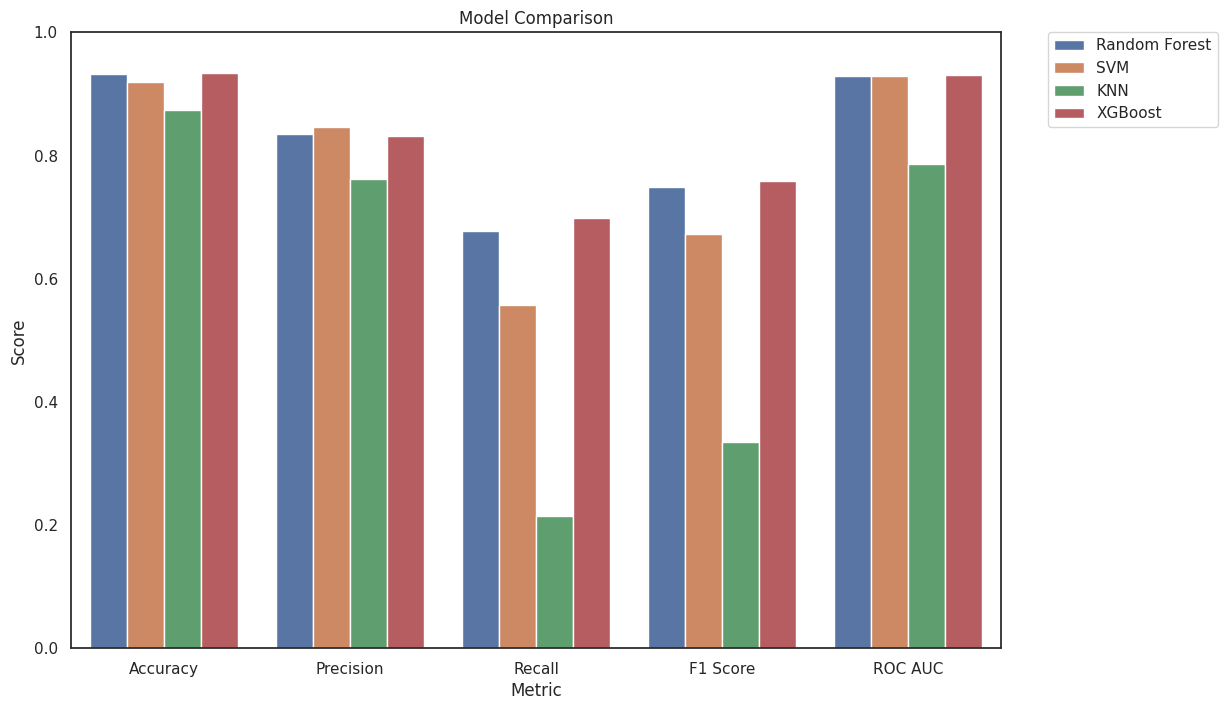

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Define the models
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
svm = SVC(kernel='rbf', probability=True, random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# List of models
models = {
    'Random Forest': rf,
    'SVM': svm,
    'KNN': knn,
    'XGBoost': xgb_clf
}

# List to store the results
results_list = []

# Dictionary to store ROC curve data
roc_curves = {}

# Perform cross-validation and model evaluation
for model_name, model in models.items():
    # Perform cross-validation using StratifiedKFold
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = cross_val_score(model, X_train_split, y_train_split, cv=cv, scoring='roc_auc')

    # Train the model and make predictions
    model.fit(X_train_split, y_train_split)
    y_val_pred = model.predict(X_val_split)
    y_val_pred_prob = model.predict_proba(X_val_split)[:, 1]

    # Evaluate the model
    accuracy = accuracy_score(y_val_split, y_val_pred)
    precision = precision_score(y_val_split, y_val_pred)
    recall = recall_score(y_val_split, y_val_pred)
    f1 = f1_score(y_val_split, y_val_pred)
    roc_auc = roc_auc_score(y_val_split, y_val_pred_prob)

    # Append the results to the list
    results_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

    # Store ROC curve data
    fpr, tpr, _ = roc_curve(y_val_split, y_val_pred_prob)
    roc_curves[model_name] = (fpr, tpr, roc_auc)

# Convert the results list to a DataFrame
results = pd.DataFrame(results_list)

# Melt the DataFrame for seaborn plotting
results_melted = results.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot the evaluation metrics
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=results_melted)
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



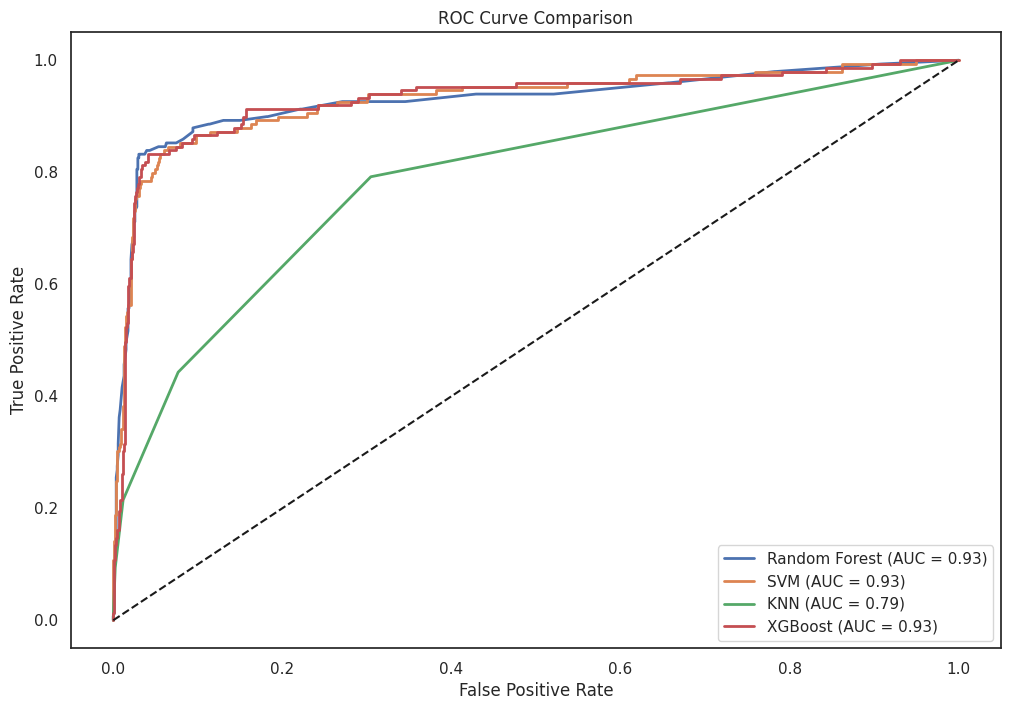

In [107]:
# Plot the ROC curves
plt.figure(figsize=(12, 8))
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})',linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


## Model developing based on **XGBoost** Method

In [108]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split

# Convert data type into 'DMatrix' type
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set XGBoost parameters
params = {
    'max_depth': 3,
    'min_child_weight': 1,
    'eta': 0.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective': 'binary:logistic',
}

# Set cross-validation parameters
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=1000,
    seed=42,
    nfold=5,
    metrics={'auc'},
    early_stopping_rounds=10
)

print(cv_results)

    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.793658       0.001911       0.792034      0.007458
1         0.795462       0.001601       0.792793      0.007742
2         0.863950       0.006405       0.858361      0.017618
3         0.870657       0.002632       0.867745      0.010620
4         0.874818       0.006679       0.869438      0.009685
5         0.890194       0.007722       0.874816      0.016279
6         0.903369       0.007022       0.887086      0.011695
7         0.912753       0.004442       0.895683      0.011400
8         0.920750       0.009562       0.903247      0.010970
9         0.930442       0.005899       0.912074      0.010869
10        0.936765       0.004676       0.918091      0.008451
11        0.940543       0.004083       0.920707      0.010087
12        0.942316       0.004835       0.922384      0.008794
13        0.943817       0.005397       0.922496      0.009051
14        0.947064       0.001866       0.926877      0

In [109]:
# train model
num_boost_round = 1000
bst = xgb.train(params, dtrain, num_boost_round)

# Predicting test set probabilities
y_pred_proba = bst.predict(dtest)

# Output the first 10 predicted probabilities
print("The first 10 predicted probabilities:", y_pred_proba[:10])

The first 10 predicted probabilities: [2.3451918e-05 3.3364279e-04 1.4680289e-01 3.7253154e-05 3.0618240e-03
 7.0543616e-04 4.7294073e-02 9.6300042e-01 3.9414914e-05 1.3505135e-03]


In [110]:
pd.Series(y_pred_proba)

0       0.000023
1       0.000334
2       0.146803
3       0.000037
4       0.003062
          ...   
1677    0.000762
1678    0.034423
1679    0.000073
1680    0.005428
1681    0.000358
Length: 1682, dtype: float32

In [111]:
# Concate 'id' column and prediction result
result_df_GB = pd.concat([test['id'], pd.Series(y_pred_proba)], axis=1)
# Save result to csv file
result_df_GB.to_csv('result_GB.csv', index=False)

### Add weights based on feature:"average cost min"

In [115]:
weights = train['average cost min']**2 * len(y_train)
dtrain_weighted = xgb.DMatrix(X_train, label=y_train, weight=weights)

In [116]:
# Retrain XGBoost model with updated parameters
bst_final = xgb.train(params, dtrain_weighted, num_boost_round)

# Predict the test dataset
dtest = xgb.DMatrix(X_test)
y_pred_weight = bst_final.predict(dtest)

In [117]:
# Concate result with id
result_df = pd.concat([test['id'], pd.Series(y_pred_weight)], axis=1)
# Export csv file
result_df.to_csv('result_GB_weighted.csv', index=False)

In [118]:
result_df_cost = pd.concat([test['id'], pd.Series(y_pred_weight*test['average cost min']**2)], axis=1)
result_df_cost.to_csv('result_GB_weighted_times_cost2.csv', index=False)
print(result_df.head())

        id         0
0  K751808  0.000001
1  K837351  0.006543
2  K548114  0.009511
3  K736156  0.000004
4  K508080  0.000270


### Take data imbalance problems into consideration

In [119]:
scale_pos_weight=sum(train['target']==0)/sum(train['target']==1)
params_balanced = {
    'max_depth': 3,
    'min_child_weight': 1,
    'eta': 0.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective': 'binary:logistic',
    'scale_pos_weight': scale_pos_weight  # set weights
}

# Train model
num_boost_round = 1000
bst_balanced = xgb.train(params_balanced, dtrain, num_boost_round)

# Predict test dataset
y_pred_balanced = bst_balanced.predict(dtest)

In [120]:
# Set cross validation parameters
cv_results = xgb.cv(
    params_balanced,
    dtrain,
    num_boost_round=1000,
    seed=42,
    nfold=5,
    metrics={'auc'},
    early_stopping_rounds=10
)

print(cv_results)

    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.793635       0.002053       0.792579      0.007776
1         0.793911       0.002102       0.792706      0.008565
2         0.852815       0.003404       0.851063      0.013946
3         0.892712       0.005587       0.886407      0.008305
4         0.907745       0.004058       0.898246      0.009405
5         0.912584       0.002720       0.898202      0.009441
6         0.916007       0.005888       0.899730      0.009422
7         0.916777       0.005305       0.901619      0.010027
8         0.921504       0.008692       0.904871      0.010556
9         0.929505       0.008290       0.913618      0.016031
10        0.940701       0.004577       0.923244      0.013160
11        0.944391       0.001476       0.928709      0.011901
12        0.945547       0.002061       0.928511      0.012106
13        0.948517       0.002083       0.929910      0.012555
14        0.950280       0.001900       0.931242      0

In [121]:
result_df_cost = pd.concat([test['id'], pd.Series(y_pred_balanced*test['average cost min']**2)], axis=1)
result_df_cost.to_csv('result_GB_balanced.csv', index=False)

In [122]:
# Convert data type into 'DMatrix' type
dtrain_resampled = xgb.DMatrix(X_resampled, label=y_resampled)
dtest_resampled = xgb.DMatrix(X_test)


In [123]:
# train model
num_boost_round = 1000
bst = xgb.train(params, dtrain_resampled, num_boost_round)

# Predicting test set probabilities
y_pred_proba_resampled = bst.predict(dtest_resampled)

# Output the first 10 predicted probabilities
print("Output the first 10 predicted probabilities:", y_pred_proba_resampled[:10])

Output the first 10 predicted probabilities: [1.06071224e-04 1.52428299e-02 2.68016636e-01 2.65606614e-05
 6.65314794e-02 4.78372735e-04 4.68055308e-02 9.41202343e-01
 1.27235016e-05 1.02294690e-03]


### Define objective function

In [124]:
def profit_weighted_logloss(preds, dtrain):
    labels = dtrain.get_label()  # True labels
    profits = dtrain.get_weight()  # Transfer Profit as weights into training process
    preds = 1.0 / (1.0 + np.exp(-preds))  #Convert prediction into probability

    # Basic logic loss
    grad = preds - labels
    hess = preds * (1.0 - preds)

    # Profits weights
    grad_weighted = grad * profits
    hess_weighted = hess * profits

    return grad_weighted, hess_weighted

In [125]:
dtrain = xgb.DMatrix(X_train, label=y_train, weight=train['average cost min']**2)

params = {
    'max_depth': 3,
    'eta': 0.1
}

# Self defined loss function
bst_profit = xgb.train(params, dtrain, num_boost_round=10, obj=profit_weighted_logloss)

In [126]:
dtrain.get_weight()

array([0.02265958, 0.03571646, 0.05726449, ..., 0.0126916 , 0.04241829,
       0.03511614], dtype=float32)

In [127]:
y_pred_profit = bst_profit.predict(dtest)
result_df = pd.concat([test['id'], pd.Series(y_pred_profit)], axis=1)
result_df.to_csv('result_GB_profit.csv', index=False)